<a href="https://colab.research.google.com/github/Aagam1005/Machine-Learning/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-378876400.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 64.10
R² Score: 0.8656


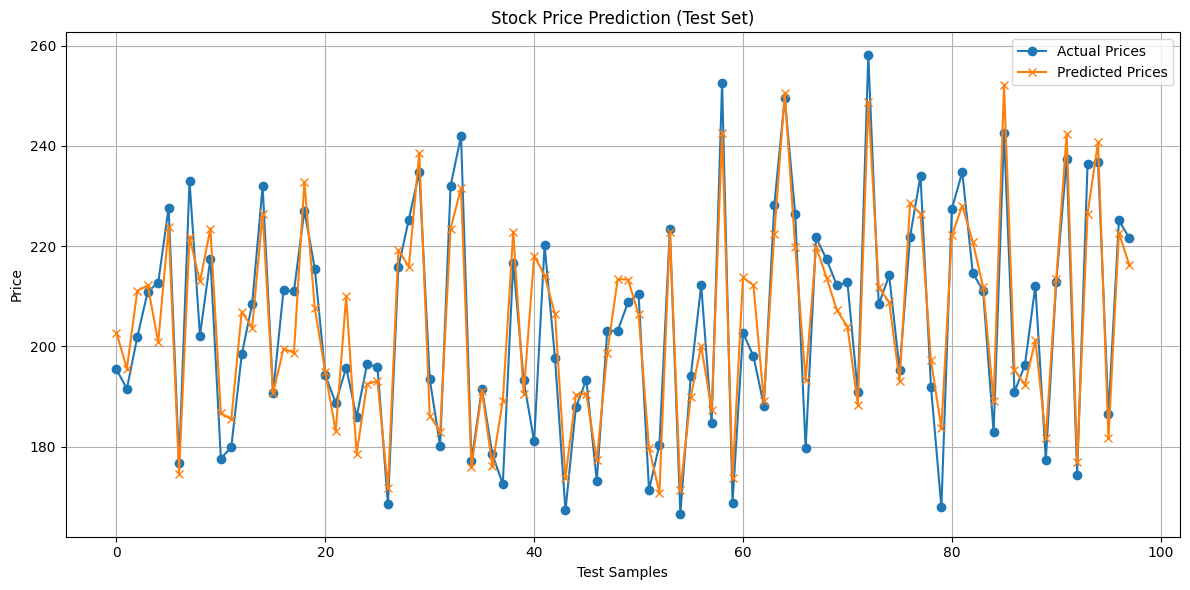

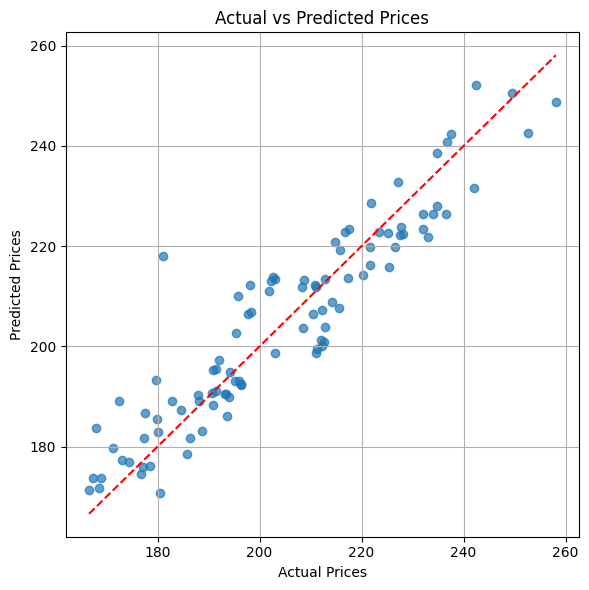

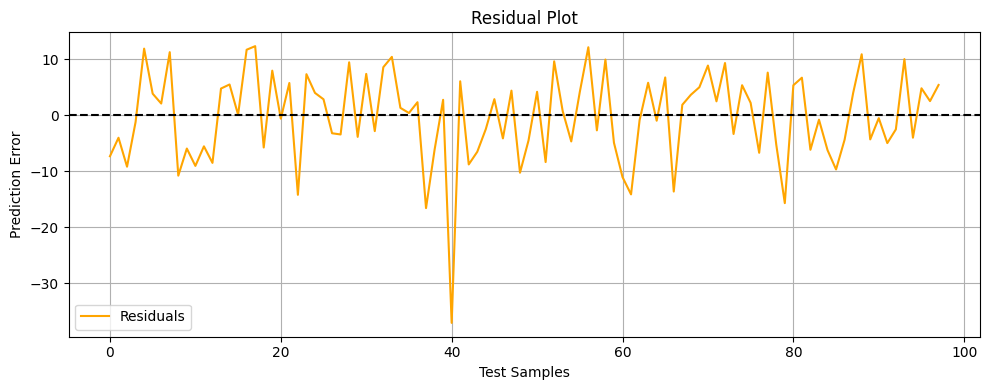

In [9]:
# Install yfinance for fetching stock data
# !pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load data
def load_data(ticker='AAPL', period='2y'):
    df = yf.download(ticker, period=period)
    df = df[['Close']].dropna()
    return df

# Step 2: Prepare features
def prepare_data(df, n_days=5):
    df['Target'] = df['Close'].shift(-n_days)
    for i in range(1, n_days+1):
        df[f'Lag_{i}'] = df['Close'].shift(i)
    df = df.dropna()
    X = df[[f'Lag_{i}' for i in range(1, n_days+1)]]
    y = df['Target']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Step 4: Predict and evaluate
def predict_and_plot(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R² Score: {r2:.4f}')

    # Line plot: Actual vs Predicted
    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label='Actual Prices', marker='o')
    plt.plot(predictions, label='Predicted Prices', marker='x')
    plt.title('Stock Price Prediction (Test Set)')
    plt.xlabel('Test Samples')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, predictions, alpha=0.7)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Residual plot
    residuals = y_test - predictions
    plt.figure(figsize=(10,4))
    plt.plot(residuals.values, label='Residuals', color='orange')
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Residual Plot")
    plt.xlabel("Test Samples")
    plt.ylabel("Prediction Error")
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()

# Main
if __name__ == "__main__":
    df = load_data(ticker='AAPL', period='2y')  # You can change ticker
    X_train, X_test, y_train, y_test = prepare_data(df, n_days=5)
    model = train_model(X_train, y_train)
    predict_and_plot(model, X_test, y_test)
